Can you write function that takes in symbol computes an array X:= gap size (in percentage) of the last 180 days and also the following:
1)Average gap size of X
2)Standard deviation of X
3) histogram of X

In [2]:
! pip install yfinance

                                              0.0/63.2 kB ? eta -:--:--
     ---------------------------------------- 63.2/63.2 kB 3.3 MB/s eta 0:00:00
                                              0.0/3.8 MB ? eta -:--:--
     ---                                      0.3/3.8 MB 4.9 MB/s eta 0:00:01
     -------                                  0.7/3.8 MB 4.7 MB/s eta 0:00:01
     -------------                            1.3/3.8 MB 5.5 MB/s eta 0:00:01
     -------------------                      1.9/3.8 MB 5.4 MB/s eta 0:00:01
     -----------------------                  2.2/3.8 MB 5.4 MB/s eta 0:00:01
     -----------------------------            2.8/3.8 MB 5.6 MB/s eta 0:00:01
     ----------------------------------       3.3/3.8 MB 6.0 MB/s eta 0:00:01
     --------------------------------------   3.6/3.8 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 5.3 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
                

In [4]:
! pip install pandas

In [3]:
! pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 2.0 MB/s eta 0:00:04
     -                                        0.2/7.6 MB 3.1 MB/s eta 0:00:03
     ---                                      0.6/7.6 MB 4.1 MB/s eta 0:00:02
     ----                                     0.8/7.6 MB 4.0 MB/s eta 0:00:02
     ------                                   1.2/7.6 MB 4.8 MB/s eta 0:00:02
     ---------                                1.8/7.6 MB 5.8 MB/s eta 0:00:02
     ------------                             2.3/7.6 MB 6.1 MB/s eta 0:00:01
     --------------                           2.7/7.6 MB 6.4 MB/s eta 0:00:01
     ----------------                         3.1/7.6 MB 6.6 MB/s eta 0:00:01
     ------------------                       3.6/7.6 MB 6.9 MB/s eta 0:00:01
     ---------------------                    4.0/7.6 MB 7.1 MB/s eta 0:00:01
     ----------------------                   4.3/7.6 MB 7.3 MB/s eta 0

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-06  132.199997  136.559998  131.029999  131.300003  131.230560   
2022-10-07  125.050003  126.699997  120.220001  120.760002  120.696121   
2022-10-10  120.370003  121.239998  114.080002  116.699997  116.638268   
2022-10-11  115.610001  118.459999  112.830002  115.860001  115.798714   
2022-10-12  115.790001  117.349998  113.449997  115.000000  114.939163   
...                ...         ...         ...         ...         ...   
2023-06-21  435.010010  436.149994  420.799988  430.450012  430.450012   
2023-06-22  422.529999  434.260010  422.339996  430.250000  430.250000   
2023-06-23  424.640015  428.089996  420.149994  422.089996  422.089996   
2023-06-26  424.609985  427.640015  401.000000  406.320007  406.320007   
2023-06-27  407.989990  419.399994  404.480

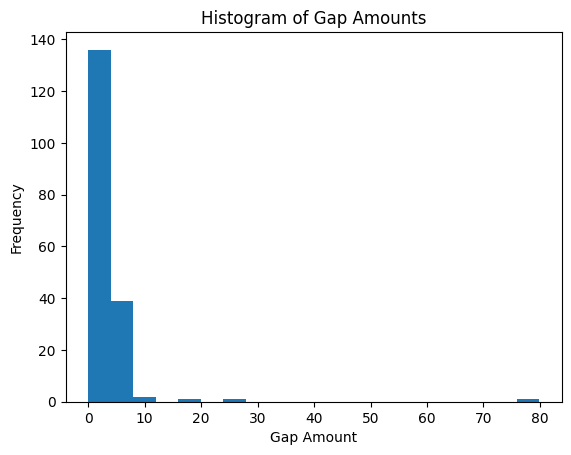

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_gap(df):
    df['gap'] = abs(df['Open'] - df['Close'].shift(1))
    return df

# Step 1: Take input of a stock symbol
stock_symbol = input("Enter the stock symbol: ")

# Step 2: Retrieve data of the stock from the past 181 trading days
data = yf.download(stock_symbol, period='181d')

# Step 3: Create a pandas DataFrame with columns ['stock ticker', 'date', 'gap']
df = pd.DataFrame(columns=['stock ticker', 'date', 'gap'])

# Step 4: Calculate the 'gap' for every day of stock data
df['stock ticker'] = stock_symbol
df['date'] = data.index
df = calculate_gap(data)

# Step 6: Print the pandas DataFrame
print(df)

# Step 7: Calculate the average value of all the 'gap amounts'
average_gap = df['gap'].mean()
print("Average gap amount:", average_gap)

# Step 8: Calculate the standard deviation of the 'gap amounts'
std_deviation = df['gap'].std()
print("Standard deviation of gap amounts:", std_deviation)

# Step 9: Create a histogram of the 'gap amounts'
plt.hist(df['gap'], bins=20)
plt.xlabel('Gap Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Gap Amounts')
plt.show()
